In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [2]:
#Loading the data
data0 = pd.read_csv('PhishingDataset.csv')
data0.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
#Checking the shape of the dataset
data0.shape

(11055, 31)

In [4]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

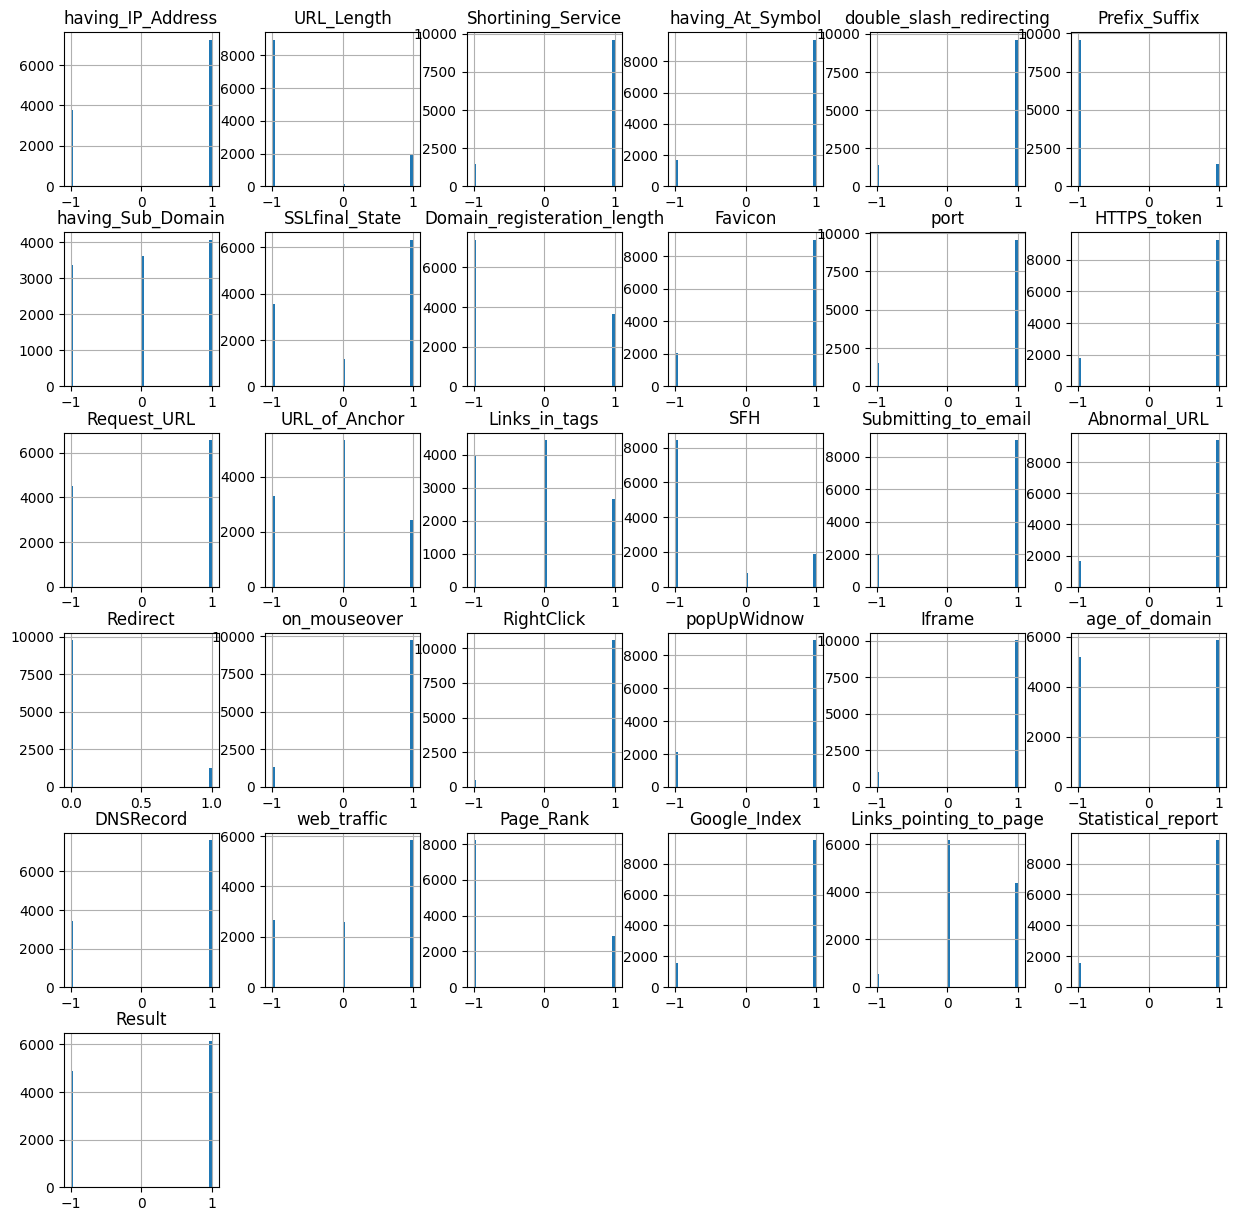

In [5]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

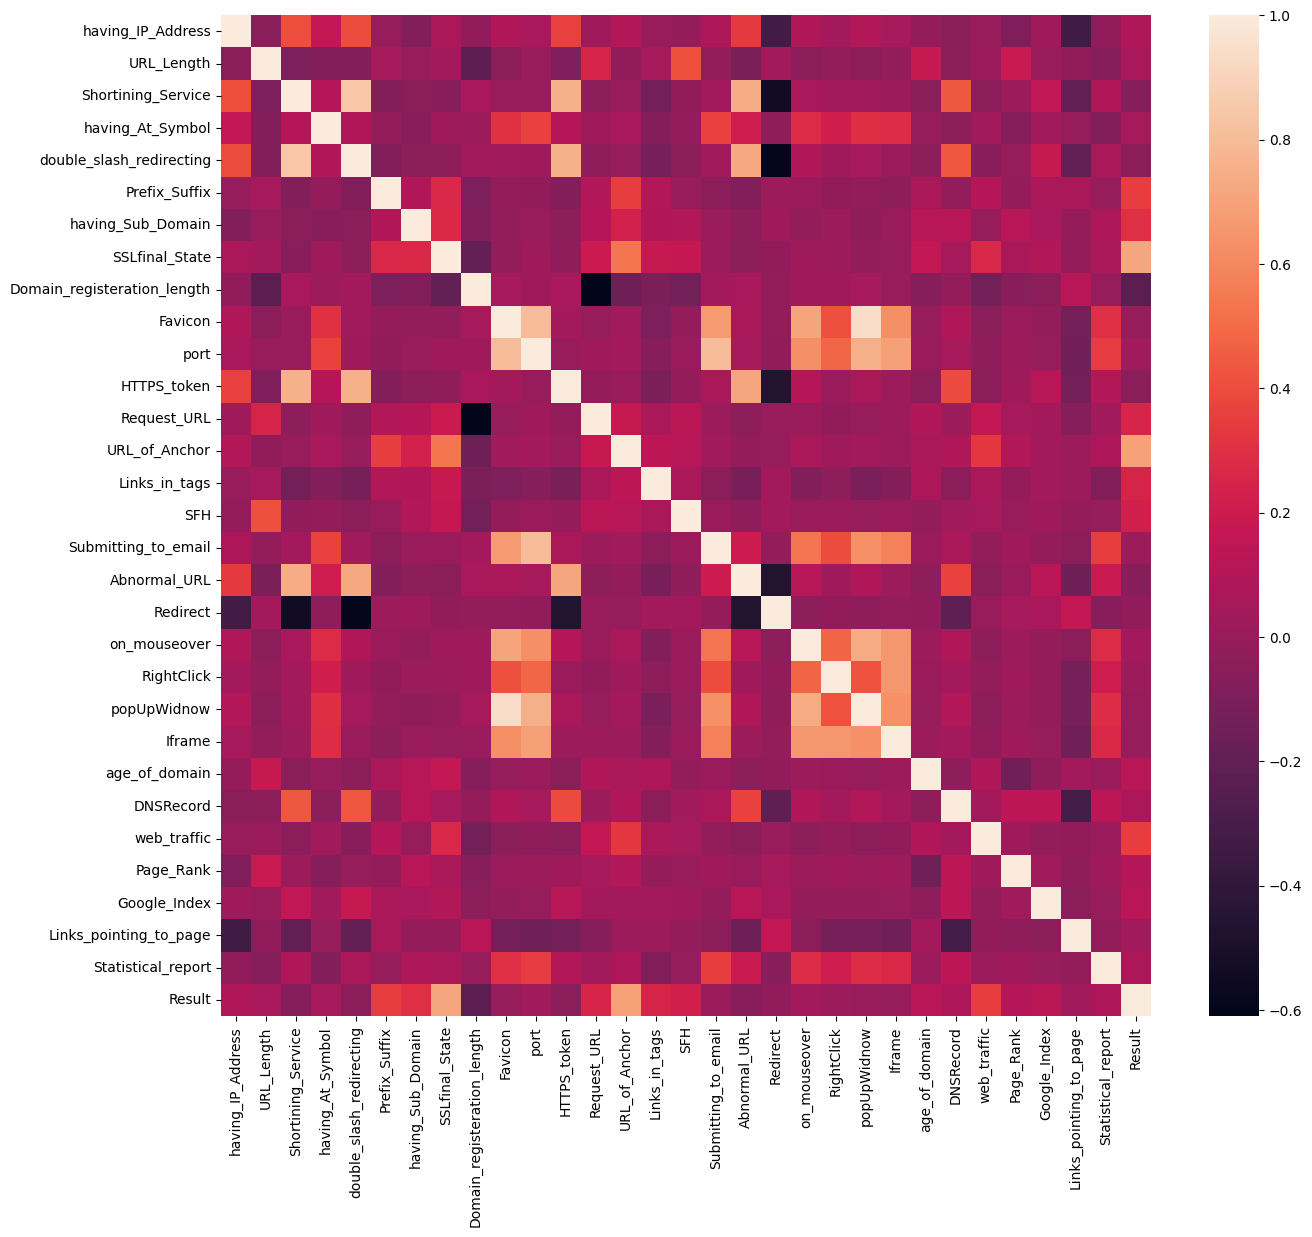

In [6]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

In [7]:
data0.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#checking the data for null or missing values
data0.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [9]:
# Sepratating & assigning features and target columns to X & y
y = data0['Result']
X = data0.drop('Result',axis=1)
X.shape, y.shape

((11055, 30), (11055,))

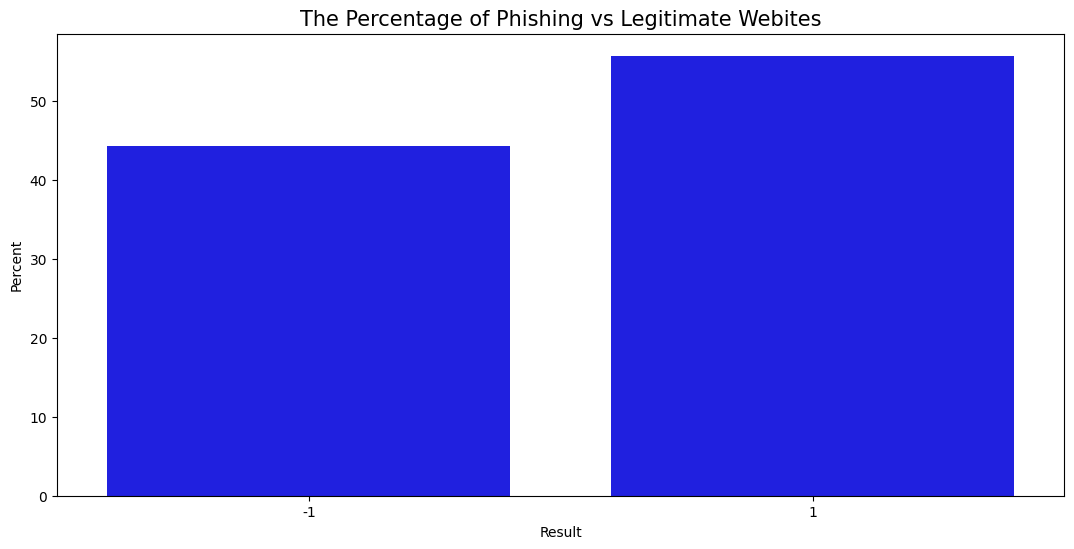

In [13]:
plt.figure(figsize=(13, 6))
ax = sns.barplot(x="Result", y="Result", data=data0, estimator=lambda x: len(x) / len(data0) * 100, color = 'Blue') # Use data0 instead of df
ax.set(ylabel="Percent");
ax.set_title('The Percentage of Phishing vs Legitimate Webites', size = 15);
plt.savefig('resultpercentageplot.png', dpi=300, bbox_inches='tight');

In [16]:
# Copy the original DataFrame
df = data0.copy()

# List of selected features
selected_features = ['URL_Length', 'Shortining_Service', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'popUpWidnow', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report']

# Select these features from the DataFrame
df_selected = df[selected_features]

# Assuming 'target' is the name of the target column in your original DataFrame
X = df_selected
y = df['Result']  # Replace 'target' with the actual name of your target column

# Display the first few rows of the new DataFrame to verify
print(df_selected.head())

   URL_Length  Shortining_Service  Prefix_Suffix  having_Sub_Domain  \
0           1                   1             -1                 -1   
1           1                   1             -1                  0   
2           0                   1             -1                 -1   
3           0                   1             -1                 -1   
4           0                  -1             -1                  1   

   SSLfinal_State  Domain_registeration_length  Request_URL  URL_of_Anchor  \
0              -1                           -1            1             -1   
1               1                           -1            1              0   
2              -1                           -1            1              0   
3              -1                            1           -1              0   
4               1                           -1            1              0   

   Links_in_tags  Submitting_to_email  Abnormal_URL  Redirect  popUpWidnow  \
0              1          

In [17]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8844, 20), (2211, 20))

In [ ]:
#importing packages
from sklearn.metrics import accuracy_score , f1_score , recall_score, roc_auc_score , precision_score, roc_curve, auc

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
acc_precision = []
acc_recall = []
acc_f1 = []
acc_roc = []

#function to call for storing the results
def storeResults(model, a,b,c,d,e,f):
  ML_Model.append(model)
  acc_train.append(round(a, 4))
  acc_test.append(round(b, 4))
  acc_precision.append(round(c, 4))
  acc_recall.append(round(d, 4))
  acc_f1.append(round(e, 4))
  acc_roc.append(round(f, 4))




# **Decision Tree**

In [ ]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth=18)
# fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=18)

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)
acc_precision_tree = precision_score(y_test,y_test_tree)
acc_recall_tree = recall_score(y_test,y_test_tree)
acc_f1_tree = f1_score(y_test,y_test_tree)
acc_roc_tree = roc_auc_score(y_test,y_test_tree)


print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print("Decision Tree: precision on test Data: {:.3f}".format(acc_precision_tree))
print("Decision Tree: recall on test Data: {:.3f}".format(acc_recall_tree))
print("Decision Tree: f1 on test Data: {:.3f}".format(acc_f1_tree))
print("Decision Tree: roc on test Data: {:.3f}".format(acc_roc_tree))

# Perform 10-fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
cv_acc = cross_val_score(tree, X_train, y_train, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(tree, X_train, y_train, cv=kf, scoring='precision')
cv_recall = cross_val_score(tree, X_train, y_train, cv=kf, scoring='recall')
cv_f1 = cross_val_score(tree, X_train, y_train, cv=kf, scoring='f1')
cv_roc = cross_val_score(tree, X_train, y_train, cv=kf, scoring='roc_auc')

print("\n10-Fold Cross-Validation Results:")
print("Average Accuracy: {:.3f}".format(cv_acc.mean()))
print("Average Precision: {:.3f}".format(cv_precision.mean()))
print("Average Recall: {:.3f}".format(cv_recall.mean()))
print("Average F1 Score: {:.3f}".format(cv_f1.mean()))
print("Average ROC AUC: {:.3f}".format(cv_roc.mean()))


Decision Tree: Accuracy on training Data: 0.988
Decision Tree: Accuracy on test Data: 0.963
Decision Tree: precision on test Data: 0.964
Decision Tree: recall on test Data: 0.969
Decision Tree: f1 on test Data: 0.967
Decision Tree: roc on test Data: 0.963

10-Fold Cross-Validation Results:
Average Accuracy: 0.961
Average Precision: 0.963
Average Recall: 0.967
Average F1 Score: 0.966
Average ROC AUC: 0.972


In [ ]:
from sklearn import metrics
print('Accucary:', metrics.accuracy_score(y_test,y_test_tree))
print('Confusion Matrix\n',metrics.confusion_matrix(y_test,y_test_tree))

Accucary: 0.9633649932157394
Confusion Matrix
 [[ 957   44]
 [  37 1173]]


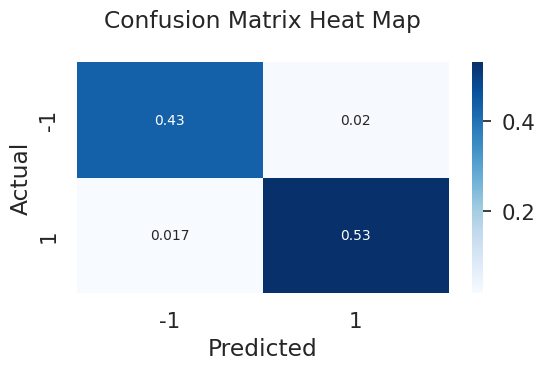

In [ ]:
# Generate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_test_tree)

# Normalize confusion matrix
data = metrics.confusion_matrix(y_test, y_test_tree, normalize='all')

# Convert confusion matrix to DataFrame for better visualization
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index=np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 3))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 10})
plt.title("Confusion Matrix Heat Map\n")
plt.savefig('ConfusionMatrix.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree,acc_precision_tree,acc_recall_tree,acc_f1_tree,acc_roc_tree)


# **Random Forest**

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=14)

# fit the model
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=14)

In [ ]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)
acc_precision_forest = precision_score(y_test,y_test_forest)
acc_recall_forest = recall_score(y_test,y_test_forest)
acc_f1_forest = f1_score(y_test,y_test_forest)
acc_roc_forest = roc_auc_score(y_test,y_test_forest)


print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print("Random forest: precision on test Data: {:.3f}".format(acc_precision_forest))
print("Random forest: recall on test Data: {:.3f}".format(acc_recall_forest))
print("Random forest: f1 on test Data: {:.3f}".format(acc_f1_forest))
print("Random forest: roc on test Data: {:.3f}".format(acc_roc_forest))

# Perform 10-fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
cv_acc = cross_val_score(forest, X_train, y_train, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(forest, X_train, y_train, cv=kf, scoring='precision')
cv_recall = cross_val_score(forest, X_train, y_train, cv=kf, scoring='recall')
cv_f1 = cross_val_score(forest, X_train, y_train, cv=kf, scoring='f1')
cv_roc = cross_val_score(forest, X_train, y_train, cv=kf, scoring='roc_auc')

print("\n10-Fold Cross-Validation Results:")
print("Average Accuracy: {:.3f}".format(cv_acc.mean()))
print("Average Precision: {:.3f}".format(cv_precision.mean()))
print("Average Recall: {:.3f}".format(cv_recall.mean()))
print("Average F1 Score: {:.3f}".format(cv_f1.mean()))
print("Average ROC AUC: {:.3f}".format(cv_roc.mean()))


Random forest: Accuracy on training Data: 0.983
Random forest: Accuracy on test Data: 0.969
Random forest: precision on test Data: 0.965
Random forest: recall on test Data: 0.979
Random forest: f1 on test Data: 0.972
Random forest: roc on test Data: 0.968

10-Fold Cross-Validation Results:
Average Accuracy: 0.966
Average Precision: 0.963
Average Recall: 0.978
Average F1 Score: 0.970
Average ROC AUC: 0.996


In [ ]:
from sklearn import metrics
print('Accucary:', metrics.accuracy_score(y_test,y_test_forest))
print('Confusion Matrix\n',metrics.confusion_matrix(y_test,y_test_forest))

Accucary: 0.9692446856625961
Confusion Matrix
 [[ 958   43]
 [  25 1185]]


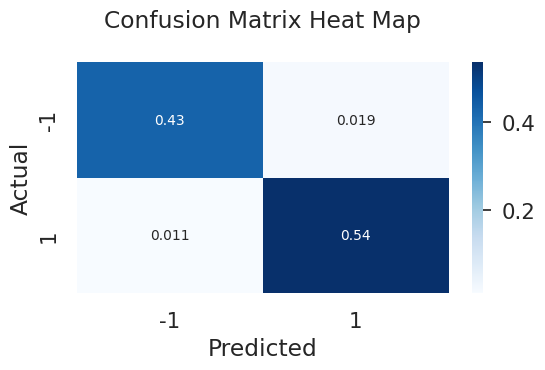

In [ ]:
# Generate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_test_forest)

# Normalize confusion matrix
data = metrics.confusion_matrix(y_test, y_test_forest, normalize='all')

# Convert confusion matrix to DataFrame for better visualization
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index=np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 3))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 10})
plt.title("Confusion Matrix Heat Map\n")
plt.savefig('ConfusionMatrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest,acc_precision_forest,acc_recall_forest,acc_f1_forest,acc_roc_forest)


# **SVM**

In [ ]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='poly', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='poly', random_state=12)

In [ ]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)
acc_precision_svm = precision_score(y_test,y_test_svm)
acc_recall_svm = recall_score(y_test,y_test_svm)
acc_f1_svm = f1_score(y_test,y_test_svm)
acc_roc_svm = roc_auc_score(y_test,y_test_svm)


print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM: Accuracy on test Data: {:.3f}".format(acc_test_svm))
print("SVM: precision on test Data: {:.3f}".format(acc_precision_svm))
print("SVM: recall on test Data: {:.3f}".format(acc_recall_svm))
print("SVM: f1 on test Data: {:.3f}".format(acc_f1_svm))
print("SVM: roc on test Data: {:.3f}".format(acc_roc_svm))

# Perform 10-fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
cv_acc = cross_val_score(svm, X_train, y_train, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(svm, X_train, y_train, cv=kf, scoring='precision')
cv_recall = cross_val_score(svm, X_train, y_train, cv=kf, scoring='recall')
cv_f1 = cross_val_score(svm, X_train, y_train, cv=kf, scoring='f1')
cv_roc = cross_val_score(svm, X_train, y_train, cv=kf, scoring='roc_auc')

print("\n10-Fold Cross-Validation Results:")
print("Average Accuracy: {:.3f}".format(cv_acc.mean()))
print("Average Precision: {:.3f}".format(cv_precision.mean()))
print("Average Recall: {:.3f}".format(cv_recall.mean()))
print("Average F1 Score: {:.3f}".format(cv_f1.mean()))
print("Average ROC AUC: {:.3f}".format(cv_roc.mean()))


SVM: Accuracy on training Data: 0.958
SVM: Accuracy on test Data: 0.959
SVM: precision on test Data: 0.955
SVM: recall on test Data: 0.970
SVM: f1 on test Data: 0.963
SVM: roc on test Data: 0.958

10-Fold Cross-Validation Results:
Average Accuracy: 0.950
Average Precision: 0.946
Average Recall: 0.966
Average F1 Score: 0.956
Average ROC AUC: 0.990


In [ ]:
from sklearn import metrics
print('Accucary:', metrics.accuracy_score(y_test,y_test_svm))
print('Confusion Matrix\n',metrics.confusion_matrix(y_test,y_test_svm))

Accucary: 0.9588421528720036
Confusion Matrix
 [[ 946   55]
 [  36 1174]]


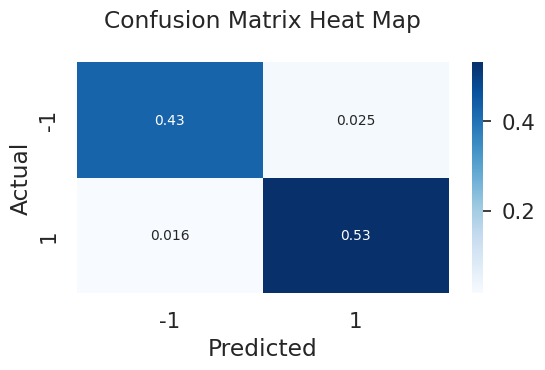

In [ ]:
# Generate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_test_svm)

# Normalize confusion matrix
data = metrics.confusion_matrix(y_test, y_test_svm, normalize='all')

# Convert confusion matrix to DataFrame for better visualization
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index=np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 3))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 10})
plt.title("Confusion Matrix Heat Map\n")
plt.savefig('ConfusionMatrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm,acc_precision_svm,acc_recall_svm,acc_f1_svm,acc_roc_svm)


# **Logistic Regression**

In [ ]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

# instantiate the model
lr = LogisticRegression(C=1.0, random_state=12, solver='lbfgs', max_iter=1000)
# fit the model
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=12)

In [ ]:
# predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Computing the accuracy of the model performance for Logistic Regression
acc_train_lr = accuracy_score(y_train, y_train_lr)
acc_test_lr = accuracy_score(y_test, y_test_lr)
acc_precision_lr = precision_score(y_test, y_test_lr)
acc_recall_lr = recall_score(y_test, y_test_lr)
acc_f1_lr = f1_score(y_test, y_test_lr)
acc_roc_lr = roc_auc_score(y_test, y_test_lr)

print("Logistic Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Logistic Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print("Logistic Regression: Precision on test Data: {:.3f}".format(acc_precision_lr))
print("Logistic Regression: Recall on test Data: {:.3f}".format(acc_recall_lr))
print("Logistic Regression: F1 Score on test Data: {:.3f}".format(acc_f1_lr))
print("Logistic Regression: ROC AUC on test Data: {:.3f}".format(acc_roc_lr))

# Perform 10-fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
cv_acc = cross_val_score(lr, X_train, y_train, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(lr, X_train, y_train, cv=kf, scoring='precision')
cv_recall = cross_val_score(lr, X_train, y_train, cv=kf, scoring='recall')
cv_f1 = cross_val_score(lr, X_train, y_train, cv=kf, scoring='f1')
cv_roc = cross_val_score(lr, X_train, y_train, cv=kf, scoring='roc_auc')

print("\n10-Fold Cross-Validation Results:")
print("Average Accuracy: {:.3f}".format(cv_acc.mean()))
print("Average Precision: {:.3f}".format(cv_precision.mean()))
print("Average Recall: {:.3f}".format(cv_recall.mean()))
print("Average F1 Score: {:.3f}".format(cv_f1.mean()))
print("Average ROC AUC: {:.3f}".format(cv_roc.mean()))


Logistic Regression: Accuracy on training Data: 0.928
Logistic Regression: Accuracy on test Data: 0.933
Logistic Regression: Precision on test Data: 0.931
Logistic Regression: Recall on test Data: 0.948
Logistic Regression: F1 Score on test Data: 0.939
Logistic Regression: ROC AUC on test Data: 0.932

10-Fold Cross-Validation Results:
Average Accuracy: 0.926
Average Precision: 0.925
Average Recall: 0.945
Average F1 Score: 0.935
Average ROC AUC: 0.978


In [ ]:
from sklearn import metrics
print('Accucary:', metrics.accuracy_score(y_test,y_test_lr))
print('Confusion Matrix\n',metrics.confusion_matrix(y_test,y_test_lr))

Accucary: 0.9330619629127092
Confusion Matrix
 [[ 916   85]
 [  63 1147]]


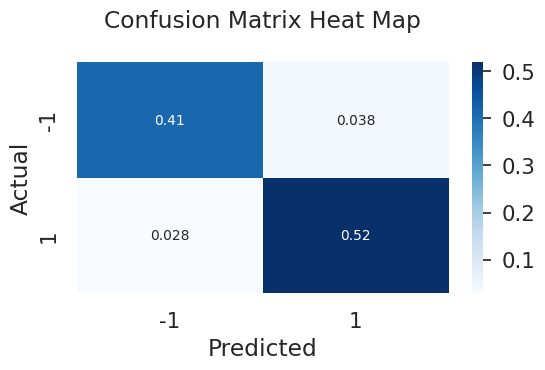

In [ ]:
# Generate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_test_lr)

# Normalize confusion matrix
data = metrics.confusion_matrix(y_test, y_test_lr, normalize='all')

# Convert confusion matrix to DataFrame for better visualization
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index=np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 3))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 10})
plt.title("Confusion Matrix Heat Map\n")
plt.savefig('ConfusionMatrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Logistic Regression', acc_train_lr, acc_test_lr,acc_precision_lr,acc_recall_lr,acc_f1_lr,acc_roc_lr)


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=5)
# fit the model
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# predicting the target value from the model for the samples
y_test_knn = knn.predict(X_test)
y_train_knn = knn.predict(X_train)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Computing the accuracy of the model performance for K-Nearest Neighbors
acc_train_knn = accuracy_score(y_train, y_train_knn)
acc_test_knn = accuracy_score(y_test, y_test_knn)
acc_precision_knn = precision_score(y_test, y_test_knn)
acc_recall_knn = recall_score(y_test, y_test_knn)
acc_f1_knn = f1_score(y_test, y_test_knn)
acc_roc_knn = roc_auc_score(y_test, y_test_knn)

print("K-Nearest Neighbors: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors: Accuracy on test Data: {:.3f}".format(acc_test_knn))
print("K-Nearest Neighbors: Precision on test Data: {:.3f}".format(acc_precision_knn))
print("K-Nearest Neighbors: Recall on test Data: {:.3f}".format(acc_recall_knn))
print("K-Nearest Neighbors: F1 Score on test Data: {:.3f}".format(acc_f1_knn))
print("K-Nearest Neighbors: ROC AUC on test Data: {:.3f}".format(acc_roc_knn))

# Perform 10-fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
cv_acc = cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(knn, X_train, y_train, cv=kf, scoring='precision')
cv_recall = cross_val_score(knn, X_train, y_train, cv=kf, scoring='recall')
cv_f1 = cross_val_score(knn, X_train, y_train, cv=kf, scoring='f1')
cv_roc = cross_val_score(knn, X_train, y_train, cv=kf, scoring='roc_auc')

print("\n10-Fold Cross-Validation Results:")
print("Average Accuracy: {:.3f}".format(cv_acc.mean()))
print("Average Precision: {:.3f}".format(cv_precision.mean()))
print("Average Recall: {:.3f}".format(cv_recall.mean()))
print("Average F1 Score: {:.3f}".format(cv_f1.mean()))
print("Average ROC AUC: {:.3f}".format(cv_roc.mean()))


K-Nearest Neighbors: Accuracy on training Data: 0.963
K-Nearest Neighbors: Accuracy on test Data: 0.945
K-Nearest Neighbors: Precision on test Data: 0.947
K-Nearest Neighbors: Recall on test Data: 0.952
K-Nearest Neighbors: F1 Score on test Data: 0.950
K-Nearest Neighbors: ROC AUC on test Data: 0.944

10-Fold Cross-Validation Results:
Average Accuracy: 0.940
Average Precision: 0.945
Average Recall: 0.949
Average F1 Score: 0.947
Average ROC AUC: 0.982


In [ ]:
from sklearn import metrics
print('Accucary:', metrics.accuracy_score(y_test,y_test_knn))
print('Confusion Matrix\n',metrics.confusion_matrix(y_test,y_test_knn))

Accucary: 0.9448213478064225
Confusion Matrix
 [[ 937   64]
 [  58 1152]]


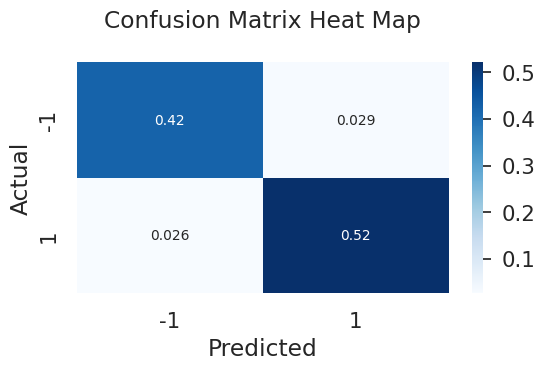

In [ ]:
# Generate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_test_knn)

# Normalize confusion matrix
data = metrics.confusion_matrix(y_test, y_test_knn, normalize='all')

# Convert confusion matrix to DataFrame for better visualization
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index=np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 3))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 10})
plt.title("Confusion Matrix Heat Map\n")
plt.savefig('ConfusionMatrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('KNN', acc_train_knn, acc_test_knn,acc_precision_knn,acc_recall_knn,acc_f1_knn,acc_roc_knn)

## **XGBoost Classifier**

In [ ]:
from xgboost import XGBClassifier
import numpy as np

# Hyperparameter tuning
xgb = XGBClassifier(learning_rate=0.5,max_depth=10,n_estimators=400,subsample=0.9,
    colsample_bytree=0.8,gamma=0.5,reg_alpha=0.3,reg_lambda=0.9,scale_pos_weight=2,random_state=42)

# Convert -1 to 0 in y_train and y_test using numpy
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)

# Fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)
acc_precision_xgb = precision_score(y_test,y_test_xgb)
acc_recall_xgb = recall_score(y_test,y_test_xgb)
acc_f1_xgb = f1_score(y_test,y_test_xgb)
acc_roc_xgb = roc_auc_score(y_test,y_test_xgb)


print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost: Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print("XGBoost: precision on test Data: {:.3f}".format(acc_precision_xgb))
print("XGBoost: recall on test Data: {:.3f}".format(acc_recall_xgb))
print("XGBoost: f1 on test Data: {:.3f}".format(acc_f1_xgb))
print("XGBoost: roc on test Data: {:.3f}".format(acc_roc_xgb))

# Perform 10-fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
cv_acc = cross_val_score(xgb, X_train, y_train, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(xgb, X_train, y_train, cv=kf, scoring='precision')
cv_recall = cross_val_score(xgb, X_train, y_train, cv=kf, scoring='recall')
cv_f1 = cross_val_score(xgb, X_train, y_train, cv=kf, scoring='f1')
cv_roc = cross_val_score(xgb, X_train, y_train, cv=kf, scoring='roc_auc')

print("\n10-Fold Cross-Validation Results:")
print("Average Accuracy: {:.3f}".format(cv_acc.mean()))
print("Average Precision: {:.3f}".format(cv_precision.mean()))
print("Average Recall: {:.3f}".format(cv_recall.mean()))
print("Average F1 Score: {:.3f}".format(cv_f1.mean()))
print("Average ROC AUC: {:.3f}".format(cv_roc.mean()))


XGBoost: Accuracy on training Data: 0.985
XGBoost: Accuracy on test Data: 0.975
XGBoost: precision on test Data: 0.965
XGBoost: recall on test Data: 0.990
XGBoost: f1 on test Data: 0.978
XGBoost: roc on test Data: 0.974

10-Fold Cross-Validation Results:
Average Accuracy: 0.969
Average Precision: 0.958
Average Recall: 0.987
Average F1 Score: 0.972
Average ROC AUC: 0.996


In [ ]:
from sklearn import metrics
print('Accucary:', metrics.accuracy_score(y_test,y_test_xgb))
print('Confusion Matrix\n',metrics.confusion_matrix(y_test,y_test_xgb))

Accucary: 0.9751243781094527
Confusion Matrix
 [[ 958   43]
 [  12 1198]]


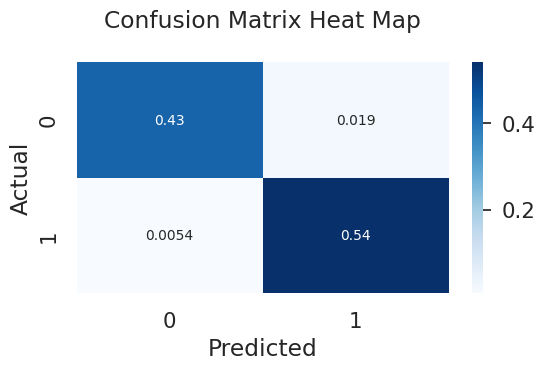

In [ ]:
# Generate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_test_xgb)

# Normalize confusion matrix
data = metrics.confusion_matrix(y_test, y_test_xgb, normalize='all')

# Convert confusion matrix to DataFrame for better visualization
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index=np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 3))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 10})
plt.title("Confusion Matrix Heat Map\n")
plt.savefig('ConfusionMatrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb,acc_precision_xgb,acc_recall_xgb,acc_f1_xgb,acc_roc_xgb)


In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Test Accuracy': acc_test,
    'Precision': acc_precision,
    'Recall' : acc_recall,
    'f1 score': acc_f1,
    'ROC_AUC': acc_roc})

In [ ]:
results

,ML Model,Test Accuracy,Precision,Recall,f1 score,ROC_AUC
0,Decision Tree,0.9634,0.9638,0.9694,0.9666,0.9627
1,Random Forest,0.9692,0.9650,0.9793,0.9721,0.9682
2,SVM,0.9588,0.9552,0.9702,0.9627,0.9577
3,Logistic Regression,0.9331,0.9310,0.9479,0.9394,0.9315
4,KNN,0.9448,0.9474,0.9521,0.9497,0.9441
5,XGBoost,0.9751,0.9654,0.9901,0.9776,0.9736


# **Results**

In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy'], ascending=False)


,ML Model,Test Accuracy,Precision,Recall,f1 score,ROC_AUC
5,XGBoost,0.9751,0.9654,0.9901,0.9776,0.9736
1,Random Forest,0.9692,0.9650,0.9793,0.9721,0.9682
0,Decision Tree,0.9634,0.9638,0.9694,0.9666,0.9627
2,SVM,0.9588,0.9552,0.9702,0.9627,0.9577
4,KNN,0.9448,0.9474,0.9521,0.9497,0.9441
3,Logistic Regression,0.9331,0.9310,0.9479,0.9394,0.9315


In [ ]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_test_tree, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_test_forest, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_test_svm, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, y_test_xgb, pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, y_test_lr, pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, y_test_knn, pos_label=1)




# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

<ipython-input-473-5a81dd4ecc9c>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


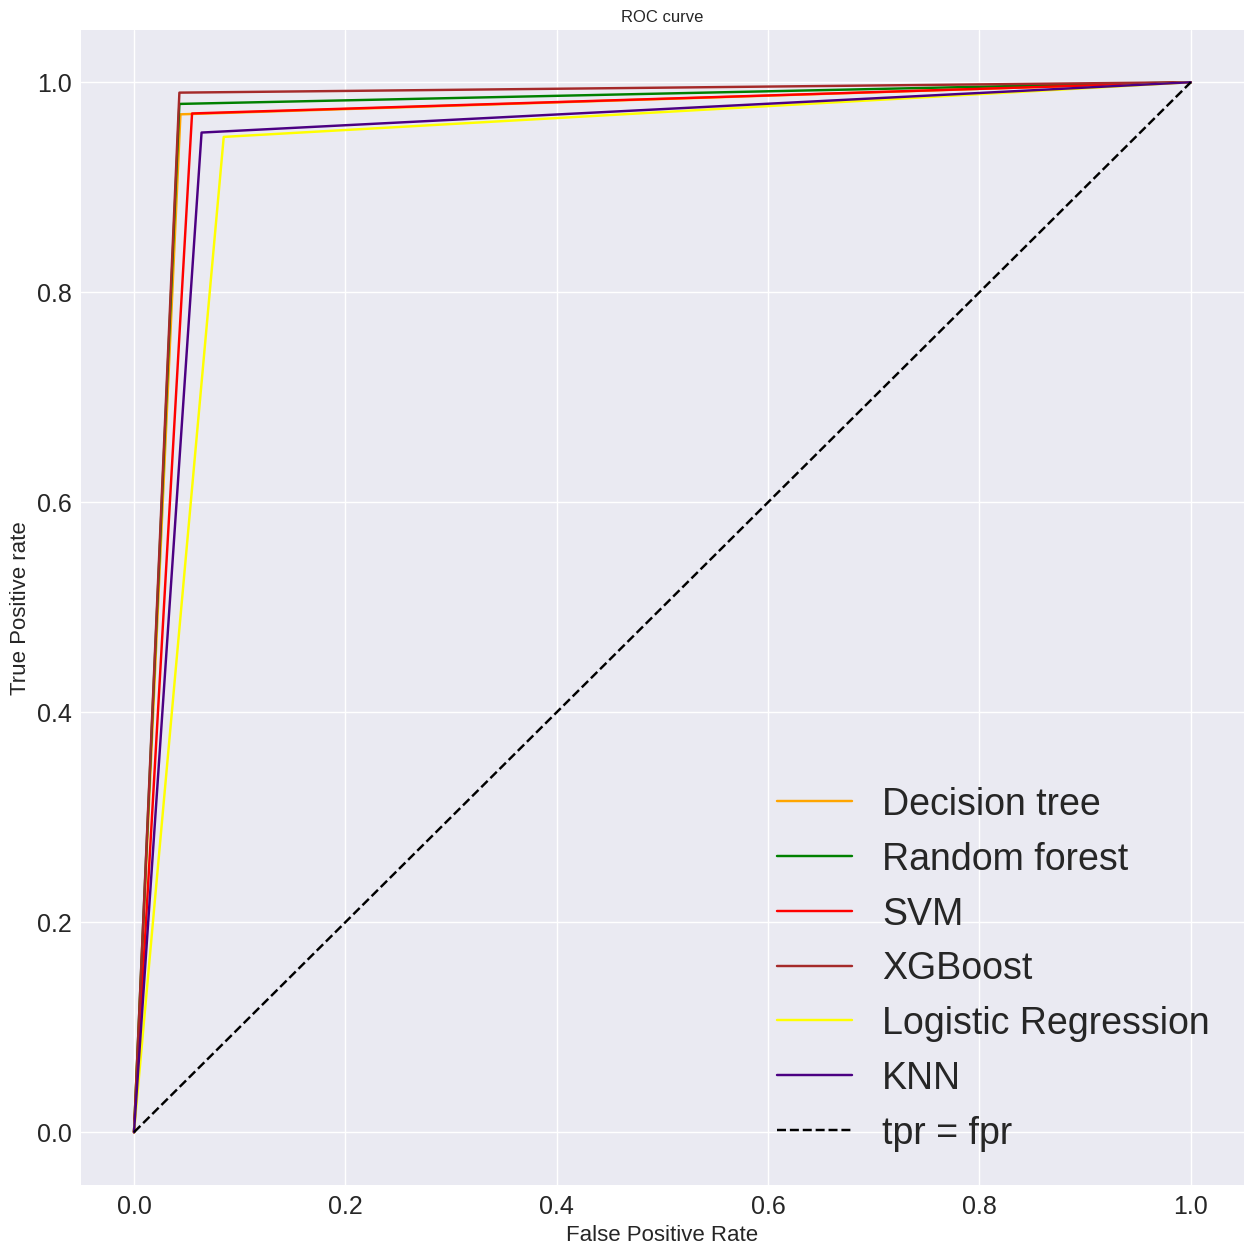

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.style.use('seaborn')
plt.figure(figsize=(15,15))
plt.rc('axes', labelsize=17)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(prop={"size":18})
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='-',color='orange', label='Decision tree')
plt.plot(fpr2, tpr2, linestyle='-',color='green', label='Random forest')
plt.plot(fpr3, tpr3, linestyle='-',color='red', label='SVM')
plt.plot(fpr4, tpr4, linestyle='-',color='brown', label='XGBoost')
plt.plot(fpr5, tpr5, linestyle='-',color='yellow', label='Logistic Regression')
plt.plot(fpr6, tpr6, linestyle='-',color='indigo', label='KNN')



plt.plot(p_fpr, p_tpr, linestyle='--', color='black',label='tpr = fpr')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate',fontsize=16)
# y label
plt.ylabel('True Positive rate',fontsize=16)

plt.legend(loc='best',fontsize=27)
plt.savefig('ROC')
plt.show();